In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel, ylabel

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [2]:
#a)
#Your code:
df_house=pd.read_csv("kc_house_data.csv")
df_house.head()

#Hint: read_csv(), head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
#b)
print(df_house.columns)
house_categorical_df =df_house[['id', 'waterfront', 'view', 'condition', 'grade', 'zipcode']]
house_numerical_df = df_house[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]



Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [6]:
#c)
#Your code:
house_numerical_df.describe()

#Hint: Function describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


### Are they all meaningful?
 No, they are not.
  1. First of all, the "Count" gives us in each column the same number: 21613 which means the all number of records. So, the record count itself doesn't necessarily speak to the meaningfulness of the variables. 
 2. Secondly, bathrooms with a minimum of 0: The presence of properties with 0 bathrooms could indicate incorrect data. These values could distort overall trends, making certain statistics less meaningful.
 3. Last but not least, Having 0 values for the renovation year distorts the statistics by lowering the average and increasing the standard deviation. These 0s indicate no renovations instead of a specific year, making the data less reliable unless handled properly.

## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located.

Text(0, 0.5, 'Price')

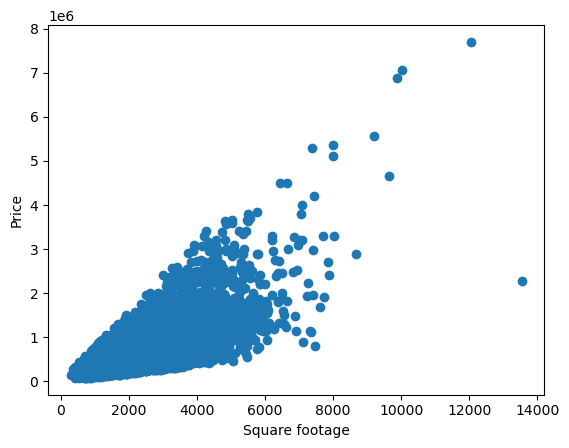

In [7]:
#a)
#Your code:
plt.scatter(df_house.sqft_living, df_house.price)
plt.xlabel("Square footage")
plt.ylabel("Price")


#Hint plt.scatter

## Comment
The scatter plot shows a clear positive correlation between square footage and price, meaning larger houses typically command higher prices—a common trend in real estate. However, this relationship is non-linear, as the rate of price increase varies, indicating that larger homes may not be priced proportionally to their size. It can depend on different variables in the model such as location, year of building and etc. Most data points cluster in the lower square footage range (0 to 6000 sqft), suggesting that smaller homes are more prevalent in the dataset. Additionally, there are a few notable outliers in the upper price range for homes over 8000 sqft, which likely represent luxury properties significantly exceeding average pricing trends. This information highlights important dynamics in the housing market.

Text(0, 0.5, 'Price')

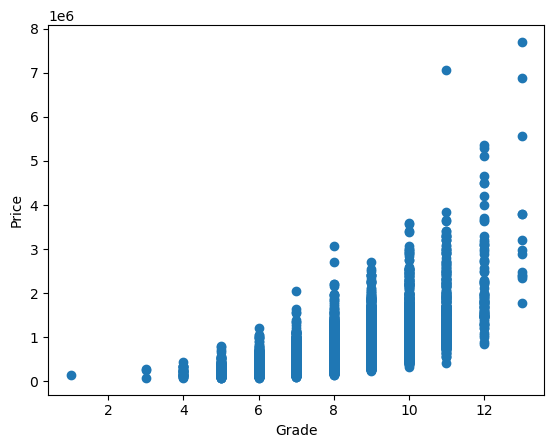

In [8]:
#b)
#Your code:
plt.scatter(df_house.grade, df_house.price)
plt.xlabel("Grade")
plt.ylabel("Price")

## Comment
The plot shows a strong positive correlation between property grade and price, with higher-grade homes generally being more expensive. Because the grades are discrete values, we see vertical lines on the X-axis. Additionally, there are outliers at higher prices for the top grades, likely representing luxury homes.

Text(0, 0.5, 'Price')

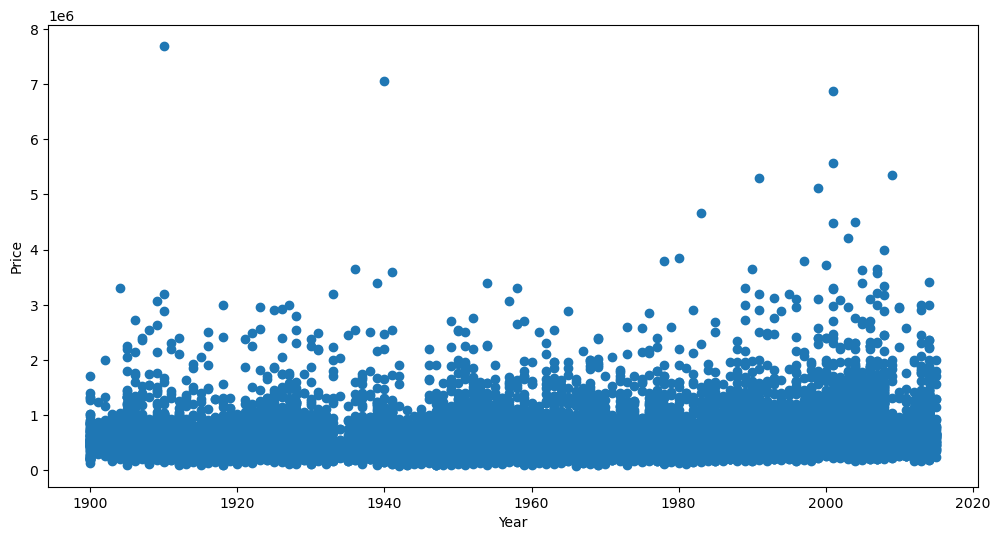

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(df_house.yr_built, df_house.price)
plt.xlabel("Year")
plt.ylabel("Price")

## Comment
As we can see, there is no significant difference in price between the years of construction. While more expensive homes tend to be built between 1980 and 2020, there are also outliers, such as a house from the early 1900s that is among the most expensive.

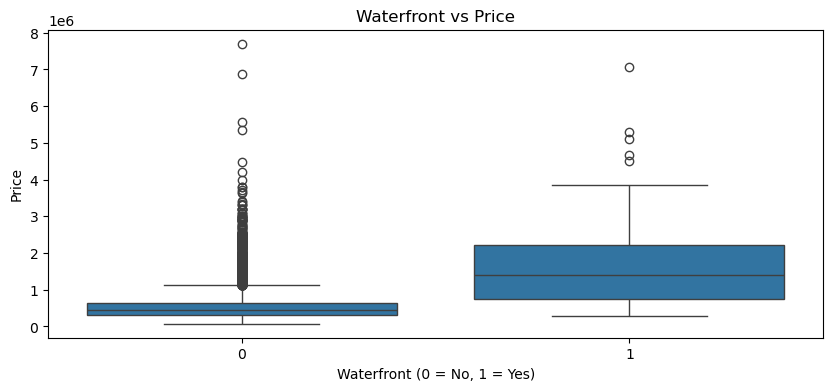

In [21]:

import seaborn as sns
plt.figure(figsize=(10, 4))  # Wider figure
sns.boxplot(x='waterfront', y='price', data=df_house)
plt.title('Waterfront vs Price')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

## Comment
Waterfront properties tend to have a significantly higher median price compared to non-waterfront properties. Additionally, there are more outliers in the waterfront group, indicating that these properties frequently command much higher prices. On the other hand, prices for non-waterfront properties are more concentrated at the lower end of the price spectrum, though some individual properties still manage to reach higher price points as outliers.

Text(0, 0.5, 'Price')

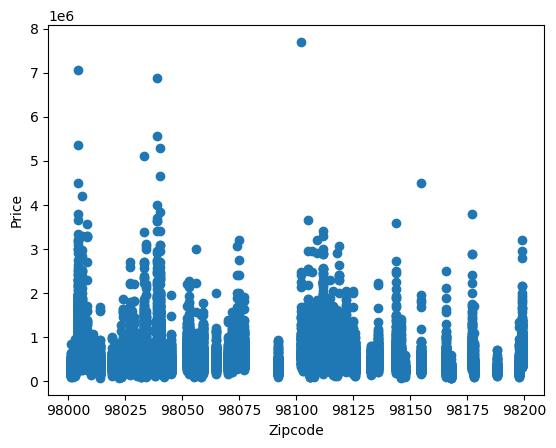

In [9]:
#c)
#Your code:
plt.scatter(df_house.zipcode, df_house.price)
plt.xlabel("Zipcode")
plt.ylabel("Price")


## Comment
On the plot we can see some interesting things:
1. Price Distribution: Prices are highly spread out across the zip codes, with a few extreme outliers where prices go above 6M. Most of the prices, however, are concentrated below 2M.
2. The Most Expensive Houses: The most expensive houses are with the zipcode form 98000 to 98075. This suggests that areas with these zip codes are highly valued, and people are willing to pay a premium to live there.
3. Housing Estate: Between 98100 to 98125 zipcodes we have probably housing estate with not that expensive prices.

Text(0, 0.5, 'Latitude')

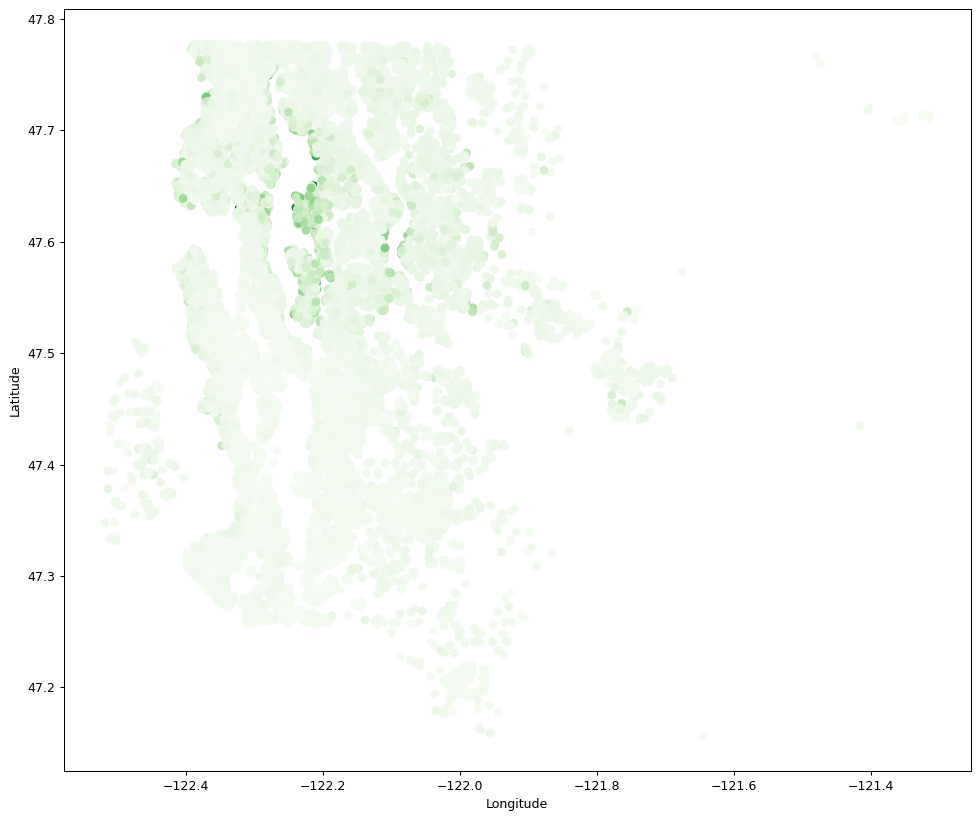

In [39]:
#Your code:
plt.figure(figsize=(13, 11), dpi=90)

# Create a scatter plot with longitudes and latitudes, coloring by price
scatter = plt.scatter(df_house['long'], df_house['lat'], c=df_house['price'], cmap="Greens",  alpha=0.95)

# Add labels for the axes
plt.xlabel("Longitude")
plt.ylabel("Latitude")


## Comment
As we can see, the most expensive homes are in the city center, especially near the water. Therefore, the location of the house matters and is correlated with the price. (Note that the brighter the dot, the higher the price of the house.)

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

Text(0, 0.5, 'Price')

<Figure size 1200x600 with 0 Axes>

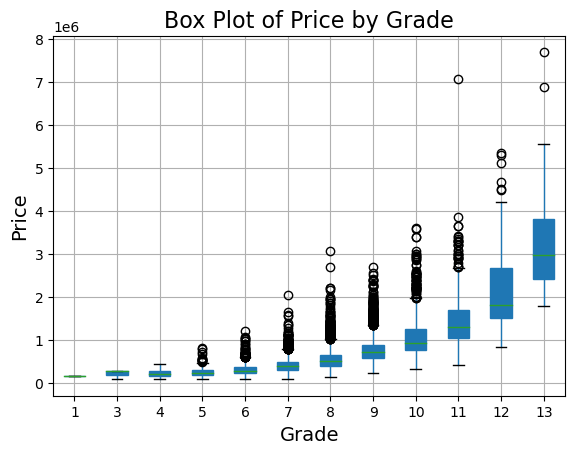

In [48]:
box_data=df_house[['price', 'grade']]
plt.figure(figsize=(12, 6))
box = box_data.boxplot(column="price", by="grade", patch_artist=True)

plt.title('Box Plot of Price by Grade', fontsize=16)
plt.suptitle('')
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Price', fontsize=14)


## Comment 
The new plot is very similar to the plot from 2b but It has more informations such as median, IQR, Whiskers and outliers. We can observe some interesting observations: 
1. Increasing Median Prices: Median prices rise significantly with higher grades, indicating that higher-grade homes are more expensive.
2. Wider Price Spread: The range of prices widens as the grade increases, indicating that higher-grade houses have more varied prices.
3. Outliers: Several outliers appear in grades 10 to 13, indicating a few exceptionally high-priced homes.
4. Lower Grades: Grades 1 to 5 have lower prices and tighter distributions, indicating more uniformity in pricing.

Text(0.5, 0, 'condition')

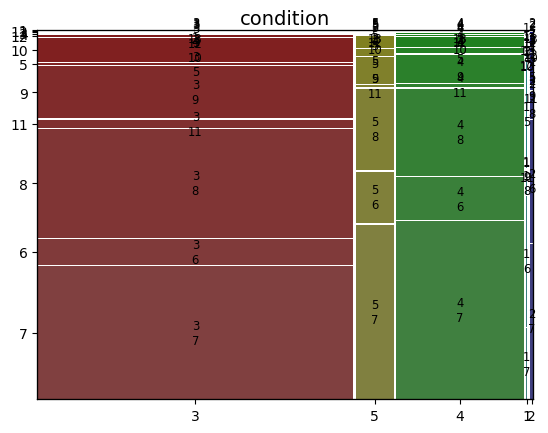

In [56]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

#Your code:
mosaic(df_house,['condition','grade'])
plt.xlabel('condition', fontsize=14)


## Comment
The mosaic plot shows the distribution of properties based on two categorical variables: condition and grade. The larger brown rectangles on the left suggest that properties with a condition 3 and certain grades are more common in the dataset. On the right side, the green and deep yellow rectangles, which are smaller, represent less frequent combinations, possibly indicating higher quality properties in better conditions. The size of each rectangle reflects the frequency of each category combination, with larger rectangles indicating more common occurrences.


## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [61]:
#a)
#Your code:
data_the_best_house = df_house.loc [(df_house['bedrooms'] == 3) & (df_house['bathrooms'] == 2) & (df_house['floors'] == 2)]
data_the_best_house.describe()
#Hint: pandas.DataFrame.loc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,1.540000e+02,154.0,154.0,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.397177e+09,5.144986e+05,3.0,2.0,1850.279221,23678.948052,2.0,0.006494,0.357143,3.435065,7.551948,1717.422078,132.857143,1969.779221,284.863636,98085.577922,47.567376,-122.247091,1802.337662,17545.123377
std,2.849813e+09,2.497661e+05,0.0,0.0,547.585413,83324.024708,0.0,0.080582,0.919495,0.713322,0.832684,527.473851,248.092631,34.654456,700.057328,48.808788,0.143221,0.150507,453.210930,40404.134611
min,7.600057e+06,2.090000e+05,3.0,2.0,1020.000000,700.000000,2.0,0.000000,0.000000,2.000000,6.000000,720.000000,0.000000,1900.000000,0.000000,98001.000000,47.194700,-122.519000,850.000000,886.000000
25%,2.060901e+09,3.769750e+05,3.0,2.0,1452.500000,3414.750000,2.0,0.000000,0.000000,3.000000,7.000000,1402.500000,0.000000,1942.250000,0.000000,98038.500000,47.498800,-122.361750,1452.500000,4020.000000
50%,3.630010e+09,4.640000e+05,3.0,2.0,1700.000000,5868.500000,2.0,0.000000,0.000000,3.000000,7.000000,1625.000000,0.000000,1984.500000,0.000000,98103.000000,47.584750,-122.299500,1725.000000,6278.000000
75%,7.184074e+09,5.894625e+05,3.0,2.0,2127.500000,10800.250000,2.0,0.000000,0.000000,4.000000,8.000000,1977.500000,207.500000,1997.500000,0.000000,98122.000000,47.682400,-122.149250,2117.500000,10392.250000
max,9.829200e+09,1.755000e+06,3.0,2.0,3650.000000,843309.000000,2.0,1.000000,4.000000,5.000000,10.000000,3650.000000,1120.000000,2014.000000,2014.000000,98199.000000,47.777000,-121.709000,3170.000000,273992.000000


Text(0, 0.5, 'Price')

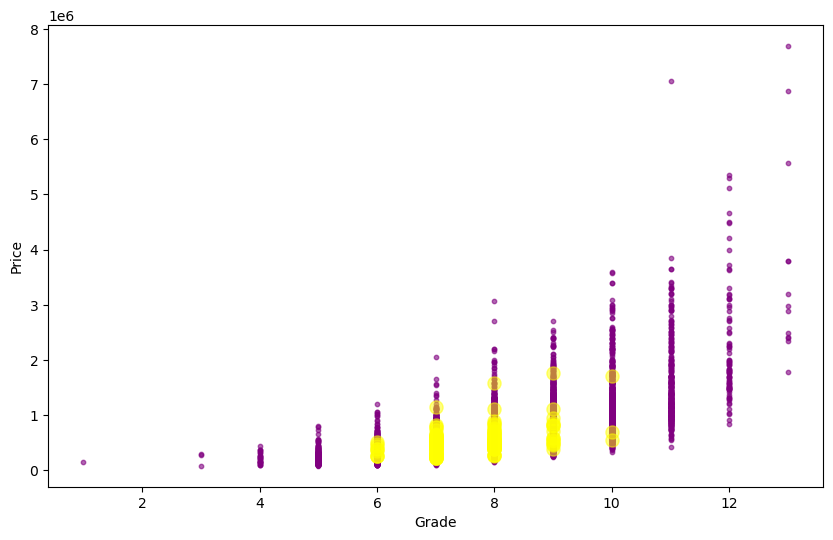

In [68]:
#b)
#Your code:
plt.figure(figsize=(10, 6))
plt.scatter(df_house['grade'], df_house['price'], color='purple', alpha=0.6, s=10)

plt.scatter(data_the_best_house['grade'], data_the_best_house['price'], color='yellow',alpha=0.5, s=90)
plt.xlabel('Grade')
plt.ylabel('Price')


## Comment 
The house will have the grade from 6 to 10 inclusively.

In [70]:
#c)
#Your code:
data_the_best_house=data_the_best_house.copy()
data_the_best_house['footage_ratio'] = data_the_best_house['price'] / data_the_best_house['sqft_living']

data_the_best_house.sort_values('footage_ratio', ascending=True)

#Hint: .loc, .sort_values(), .index

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,footage_ratio
9704,7452500565,20140829T000000,260000.0,3,2.0,2710,5000,2.0,0,0,...,2710,0,1951,0,98126,47.5188,-122.373,850,5000,95.940959
11258,7937600262,20140710T000000,379900.0,3,2.0,3110,44967,2.0,0,0,...,3020,90,1999,0,98058,47.4343,-122.082,2150,44967,122.154341
19880,3832050860,20150319T000000,210000.0,3,2.0,1580,4961,2.0,0,0,...,1580,0,2006,0,98042,47.3338,-122.053,2280,5000,132.911392
16014,5104450440,20141113T000000,252500.0,3,2.0,1810,10684,2.0,0,0,...,1810,0,1987,0,98058,47.4619,-122.153,2140,9657,139.502762
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,...,1936,0,2014,0,98001,47.2602,-122.246,1620,21600,141.993802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14379,9829200325,20140617T000000,765000.0,3,2.0,1570,7000,2.0,0,2,...,1050,520,1971,0,98122,47.6061,-122.286,1990,6675,487.261146
13853,6795100330,20140625T000000,1150000.0,3,2.0,2110,18815,2.0,0,0,...,2110,0,1979,0,98075,47.5836,-122.042,2690,21010,545.023697
10527,5318100935,20141020T000000,850000.0,3,2.0,1540,3600,2.0,0,0,...,1540,0,1900,1988,98112,47.6343,-122.283,2970,3600,551.948052
5827,9829200250,20150105T000000,1697000.0,3,2.0,2600,6600,2.0,0,4,...,1930,670,1970,2014,98122,47.6055,-122.285,2670,6270,652.692308


## Comment
The best option to choose based on the footage ratio is the house with the ID: 9704